### Домашняя работа к лекции Улучшение качества модели
##### Преподаватель: Даниил Корбут, Наталья Баданина, Александр Миленькин, Анастасия Успенская

#### Взять boston house-prices datase (sklearn.datasets.load_boston).
#### Возмите 7 любых регрессоров (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).

In [1]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge # 1. Ridge regression RidgeCV
from sklearn.linear_model import SGDRegressor # 2. Стохастический градиентный спуск
from sklearn.linear_model import ElasticNet #  3. Эластичная сеть
from sklearn.neighbors import KNeighborsRegressor # 4. K-ближайших соседей
from sklearn.svm import SVR # 5. Linear Support Vector Regression Метод опорных векторов
from sklearn.tree import DecisionTreeRegressor # 6. Дерево решений
from sklearn.ensemble import RandomForestRegressor # 7. Случайный лес
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
X = df.values
Y = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc_y.fit_transform(y_test[:, np.newaxis]).flatten()

#### Снизим размерность данных с использованием метода главных компонент PCA

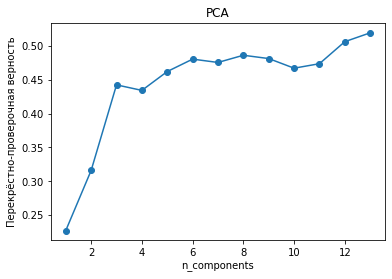

In [7]:
z = []
for n in list(range(1, 14)):
    X1_train_std = X_train_std
    pca = PCA(n_components=n)
    pca.fit(X1_train_std, y_train_std) 
    X1_train_std =  pca.transform(X1_train_std)
    scores = cross_val_score(estimator=LinearRegression(), X=X1_train_std, y=y_train_std, cv=50, n_jobs=-1)
    z.append(np.mean(scores))
plt.figure()
plt.title('PCA')
plt.plot(list(range(1, 14)), z)
plt.scatter(list(range(1, 14)), z)
plt.xlabel('n_components')
plt.ylabel('Перекрёстно-проверочная верность')
plt.show()


#### Выберем 3 компоненты

In [8]:
pca1 =  PCA(n_components=3).fit(X_train)
X_train = pca1.transform(X_train)
X_test = pca1.transform(X_test)
pca2 = PCA(n_components=3).fit(X_train_std)
X_train_std = pca2.transform(X_train_std)
X_test_std = pca2.transform(X_test_std)

In [9]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

estimators = [Ridge(), SGDRegressor(),
      ElasticNet(), KNeighborsRegressor(), SVR(), 
      DecisionTreeRegressor(), RandomForestRegressor()]

params_dict = {'Ridge':{'alpha': param_range},
              'SGDRegressor': {'loss': ['squared_loss',  'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                              'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': param_range, 'epsilon': [1e0, 0.1, 1e-2, 1e-3]},
              'ElasticNet':  {'alpha': param_range, 'l1_ratio':[0, 0.5, 1]},
               'KNeighborsRegressor': {'n_neighbors': np.arange(1, 14), 'weights': ['uniform', 'distance'],
                             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                             'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
               'SVR': {"C": param_range, "gamma": np.logspace(-2, 2, 5),
                              'kernel': ['rbf']},
               'DecisionTreeRegressor': {'criterion': ['mse', 'mae'], 'splitter': ['best', 'random'],
                              'max_depth': np.arange(1, 10)},
               'RandomForestRegressor': {'criterion': ['mse', 'mae'], 'n_estimators': np.arange(2, 100)},
              }

#### Подберем параметры моделей, выведем качество на тренировчном и тестовых наборах, для наглядности построим графики остатков

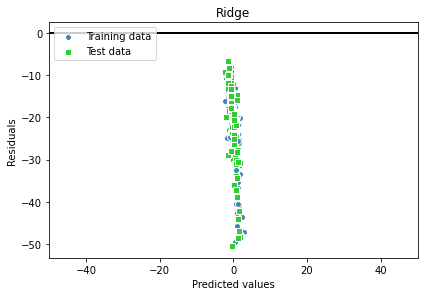

Ridge 0.6351315905637023 {'alpha': 10.0}
MSE train: 0.342, test: 0.425
R^2 train: 0.658, test: 0.575
Перекрёстно-проверочная верность на тренировочных данных: 0.450 +/- 0.616
Перекрёстно-проверочная верность на тестовых данных: -1.173 +/- 6.493



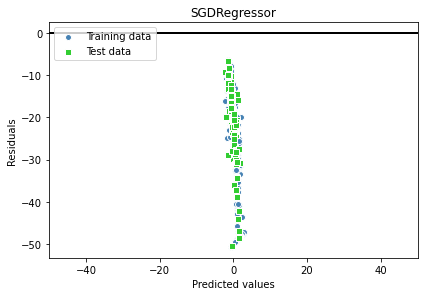

SGDRegressor 0.6385386565622004 {'alpha': 0.001, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'penalty': 'elasticnet'}
MSE train: 0.343, test: 0.428
R^2 train: 0.657, test: 0.572
Перекрёстно-проверочная верность на тренировочных данных: 0.436 +/- 0.664
Перекрёстно-проверочная верность на тестовых данных: -1.295 +/- 7.336



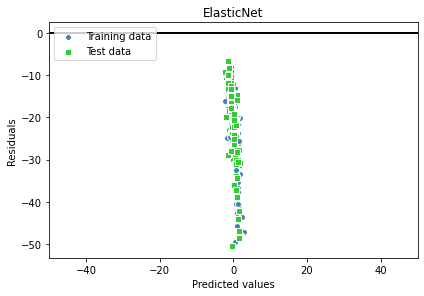

ElasticNet 0.6349679346699644 {'alpha': 0.01, 'l1_ratio': 0}
MSE train: 0.342, test: 0.426
R^2 train: 0.658, test: 0.574
Перекрёстно-проверочная верность на тренировочных данных: 0.445 +/- 0.632
Перекрёстно-проверочная верность на тестовых данных: -1.320 +/- 7.216



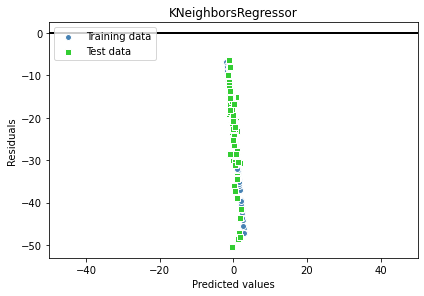

KNeighborsRegressor 0.6850622924271559 {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}
MSE train: 0.000, test: 0.394
R^2 train: 1.000, test: 0.606
Перекрёстно-проверочная верность на тренировочных данных: 0.555 +/- 0.461
Перекрёстно-проверочная верность на тестовых данных: 0.082 +/- 1.243



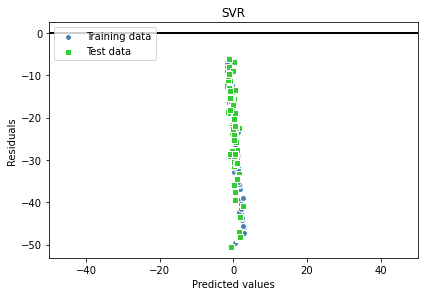

SVR 0.6707047675072909 {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
MSE train: 0.091, test: 0.436
R^2 train: 0.909, test: 0.564
Перекрёстно-проверочная верность на тренировочных данных: 0.521 +/- 0.462
Перекрёстно-проверочная верность на тестовых данных: -0.822 +/- 2.893



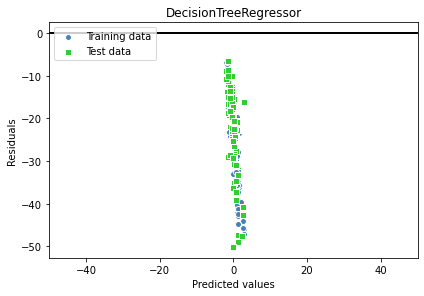

DecisionTreeRegressor 0.5554428022444499 {'criterion': 'mae', 'max_depth': 9, 'splitter': 'random'}
MSE train: 0.096, test: 0.538
R^2 train: 0.904, test: 0.462
Перекрёстно-проверочная верность на тренировочных данных: 0.109 +/- 1.700
Перекрёстно-проверочная верность на тестовых данных: -0.622 +/- 2.702



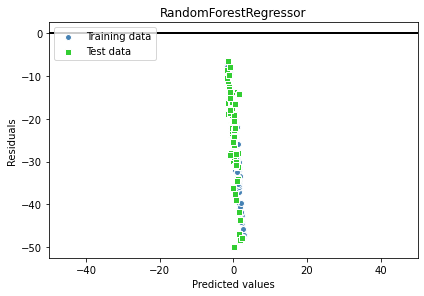

RandomForestRegressor 0.6590478460746638 {'criterion': 'mae', 'n_estimators': 11}
MSE train: 0.054, test: 0.379
R^2 train: 0.946, test: 0.621
Перекрёстно-проверочная верность на тренировочных данных: 0.399 +/- 0.941
Перекрёстно-проверочная верность на тестовых данных: -0.806 +/- 4.190



In [10]:
for estimator, model in zip(estimators, params_dict):
    gs = GridSearchCV(estimator=estimator, 
                  param_grid=params_dict.get(model),
                  scoring='r2', refit=True, cv=5,  n_jobs=-1)
    if estimator in [DecisionTreeRegressor(), RandomForestRegressor()]:
        gs = gs.fit(X_train[0], y_train)
        scores = cross_val_score(estimator=estimator.set_params(**gs.best_params_), X=X_train[0], y=y_train, cv=50, n_jobs=-1, scoring='r2')
        scores2 = cross_val_score(estimator=estimator.set_params(**gs.best_params_), X=X_test[0], y=y_test, cv=50, n_jobs=-1, scoring='r2')
        estimator.fit(X_train, y_train)
        y_train_pred = estimator.predict(X_train)
        y_test_pred = estimator.predict(X_test)
        mse_train, mse_test = mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)
        r2_train, r2_test = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)
    else:
        gs = gs.fit(X_train_std, y_train_std)
        scores = cross_val_score(estimator=estimator.set_params(**gs.best_params_), X=X_train_std, y=y_train_std, cv=50, n_jobs=-1, scoring='r2')
        scores2 = cross_val_score(estimator=estimator.set_params(**gs.best_params_), X=X_test_std, y=y_test_std, cv=50, n_jobs=-1, scoring='r2')
        estimator.fit(X_train_std, y_train_std)
        y_train_pred = estimator.predict(X_train_std)
        y_test_pred = estimator.predict(X_test_std)
        mse_train, mse_test = mean_squared_error(y_train_std, y_train_pred), mean_squared_error(y_test_std, y_test_pred)
        r2_train, r2_test = r2_score(y_train_std, y_train_pred), r2_score(y_test_std, y_test_pred)
    
    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=50, color='black', lw=2)
    plt.xlim([-50, 50])
    plt.tight_layout()
    plt.title(model)
    plt.show()
    print (model, gs.best_score_, gs.best_params_)
    print('MSE train: %.3f, test: %.3f' % (mse_train, mse_test))        
    print('R^2 train: %.3f, test: %.3f' % (r2_train, r2_test))        
    print('Перекрёстно-проверочная верность на тренировочных данных: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    print('Перекрёстно-проверочная верность на тестовых данных: %.3f +/- %.3f' % (np.mean(scores2), np.std(scores2)))
    print()       

### Лучший алгоритм регрессии:
#### K-ближайших соседей и модель с параметрами: KNeighborsRegressor  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}
### Близкая по оценке модель:
#### RandomForestRegressor {'criterion': 'mae', 'n_estimators': 99}